# **Análise e Previsão de Risco nas UPPs do RJ**

Caderno de **Projeto**

Desenvolvedor: [Luiz Felipe Gomes de Carvalho](https://www.linkedin.com/in/luiz-felipe-gomes-de-carvalho-dataanalytics/)

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Análise Exploratória de Dados;</li>
  <li>Visualização de Dados;</li>
  <li>Machine Learning.</li>
</ol>

## 1\. Introdução

### **1.1. TLDR**

 - **Processamento**:
  - GitHub Notebook
  - Kaggle Notebook
  
- **Fontes**:
 - [Instituto de Segurança Pública do RJ (ISP-RJ)](https://www.ispdados.rj.gov.br/estatistica.html)

### **1.2. Contexto**

A segurança no deslocamento urbano é um desafio constante, especialmente para veículos executivos que precisam evitar áreas de alto risco. Este projeto utiliza análise de dados e machine learning para prever a segurança de diferentes rotas no Rio de Janeiro.

A partir de dados do Instituto de Segurança Pública do RJ (ISP-RJ), analisamos crimes violentos e outras variáveis que influenciam a segurança de determinadas regiões. O objetivo é construir um modelo capaz de classificar áreas como baixo, médio ou alto risco, permitindo a tomada de decisões mais seguras no planejamento de rotas.

Com este estudo, buscamos contribuir para a segurança viária, oferecendo insights baseados em dados para minimizar riscos em deslocamentos estratégicos.

### **1.3. Dados**

Os dados utilizados neste projeto foram extraídos do **Instituto de Segurança Pública do Rio de Janeiro (ISP-RJ)** [Link](https://www.ispdados.rj.gov.br/estatistica.html). O dataset, disponível no formato CSV, contém estatísticas de segurança pública organizadas em uma série histórica mensal, abrangendo o período de janeiro de 2007 a junho de 2021. As informações são segmentadas por área de Unidade de Polícia Pacificadora (UPP), permitindo uma análise detalhada da criminalidade ao longo do tempo.

Colunas mais relevantes:

* cod_upp → Código da Unidade de Polícia Pacificadora (UPP)
* upp → Nome da Unidade de Polícia Pacificadora
* ano → Ano da ocorrência
* mes → Mês da ocorrência
* hom_doloso → Homicídios dolosos
* latrocinio → Roubo seguido de morte
* hom_por_interv_policial → Homicídios por intervenção policial
* tentat_hom → Tentativas de homicídio
* lesao_corp_dolosa → Lesões corporais dolosas
* total_roubos → Total de roubos
* total_furtos → Total de furtos
* armas_apreendidas → Armas apreendidas
* cump_mandado_prisao → Mandados de prisão cumpridos
* pol_militares_mortos_serv → Policiais militares mortos em serviço
* pol_civis_mortos_serv → Policiais civis mortos em serviço

## 2\. Análise Exploratória de Dados

### **2.2. Pacotes e bibliotecas**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import graphviz
from sklearn import tree
from folium.plugins import HeatMap, MarkerCluster
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

### **2.3. Conhecendo o arquivo**

Aqui o arquivo `segurança_rj.csv` foi transformado em um DataFrame chamado `seguranca_rj_df` com o pacote `pandas`.

In [2]:
seguranca_rj_df = pd.read_csv('segurança_rj.csv', sep=';', encoding='latin1')

In [3]:
seguranca_rj_df.head()

,cod_upp,upp,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,...,armas_apreendidas,cump_mandado_prisao,ocorr_flagrante,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias
0,1,Santa Marta,2007,1,0,0,0,0,0,1,...,2,1,0,0,0,0,0,0,0,11
1,2,Cidade de Deus,2007,1,3,0,0,0,1,18,...,7,2,11,7,2,0,0,0,0,98
2,3,Batam,2007,1,0,0,0,0,0,4,...,0,0,0,1,0,0,0,0,0,19
3,4,Chapéu Mangueira / Babilônia,2007,1,0,0,0,0,0,1,...,0,2,0,1,0,0,0,0,0,9
4,5,Pavão-Pavãozinho,2007,1,0,0,0,0,0,4,...,0,0,0,1,1,0,0,0,0,12


* **Atributos:**

In [4]:
# Colunas do DataFrame
seguranca_rj_df.columns

Index(['cod_upp', 'upp', 'ano', 'mes', 'hom_doloso', 'lesao_corp_morte',
       'latrocinio', 'hom_por_interv_policial', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_comercio', 'roubo_residencia', 'roubo_veiculo', 'roubo_carga',
       'roubo_transeunte', 'roubo_em_coletivo', 'roubo_banco',
       'roubo_cx_eletronico', 'roubo_celular', 'roubo_conducao_saque',
       'total_roubos', 'furto_veiculos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'recuperacao_veiculos', 'armas_apreendidas', 'cump_mandado_prisao',
       'ocorr_flagrante', 'ameaca', 'pessoas_desaparecidas',
       'encontro_cadaver', 'encontro_ossada', 'pol_militares_mortos_serv',
       'pol_civis_mortos_serv', 'registro_ocorrencias'],
      dtype='object')

In [5]:
# Tipo das colunas
seguranca_rj_df.dtypes

,0
cod_upp,int64
upp,object
ano,int64
mes,int64
hom_doloso,int64
lesao_corp_morte,int64
latrocinio,int64
hom_por_interv_policial,int64
tentat_hom,int64
lesao_corp_dolosa,int64


In [6]:
# Número de linhas e colunas
seguranca_rj_df.shape

(7980, 42)

* **Métodos:**

In [7]:
seguranca_rj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7980 entries, 0 to 7979
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   cod_upp                    7980 non-null   int64 
 1   upp                        7980 non-null   object
 2   ano                        7980 non-null   int64 
 3   mes                        7980 non-null   int64 
 4   hom_doloso                 7980 non-null   int64 
 5   lesao_corp_morte           7980 non-null   int64 
 6   latrocinio                 7980 non-null   int64 
 7   hom_por_interv_policial    7980 non-null   int64 
 8   tentat_hom                 7980 non-null   int64 
 9   lesao_corp_dolosa          7980 non-null   int64 
 10  estupro                    7980 non-null   int64 
 11  hom_culposo                7980 non-null   int64 
 12  lesao_corp_culposa         7980 non-null   int64 
 13  roubo_comercio             7980 non-null   int64 
 14  roubo_re

In [8]:
seguranca_rj_df.isnull().any().any()

False

**Observação:**

Após uma análise detalhada, constatou-se que o arquivo CSV contém 7.980 linhas e 42 colunas. Todas as colunas possuem valores do tipo inteiro (int), exceto a coluna upp, que é do tipo texto (string). E o arquivo não possui nenhum valor nulo.

### **2.4. Transformações dos dados**

Notou-se uma grande quantidade de colunas que não serão necessárias para o projeto. Por isso, algumas modificações serão feitas no arquivo original para manter apenas as informações mais relevantes.

####2.4.1. **Selecionando apenas as coluns mais relevantes:**

In [9]:
# Selecionar apenas as colunas relevantes
colunas_relevantes = [
    'cod_upp', 'upp', 'ano', 'mes', 'hom_doloso', 'latrocinio',
    'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa',
    'roubo_comercio', 'roubo_residencia', 'roubo_veiculo', 'roubo_carga',
    'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
    'roubo_celular', 'roubo_conducao_saque', 'total_roubos',
    'furto_veiculos', 'total_furtos', 'sequestro',
    'armas_apreendidas', 'cump_mandado_prisao',
    'pol_militares_mortos_serv', 'pol_civis_mortos_serv'
]

# Criar um novo DataFrame com essas colunas
df_relevante = seguranca_rj_df[colunas_relevantes]

# Exibir as primeiras linhas para verificar
df_relevante.head()

,cod_upp,upp,ano,mes,hom_doloso,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,roubo_comercio,...,roubo_celular,roubo_conducao_saque,total_roubos,furto_veiculos,total_furtos,sequestro,armas_apreendidas,cump_mandado_prisao,pol_militares_mortos_serv,pol_civis_mortos_serv
0,1,Santa Marta,2007,1,0,0,0,0,1,0,...,0,0,0,0,1,0,2,1,0,0
1,2,Cidade de Deus,2007,1,3,0,0,1,18,0,...,3,0,25,1,8,0,7,2,0,0
2,3,Batam,2007,1,0,0,0,0,4,0,...,0,0,7,0,5,0,0,0,0,0
3,4,Chapéu Mangueira / Babilônia,2007,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,2,0,0
4,5,Pavão-Pavãozinho,2007,1,0,0,0,0,4,0,...,1,0,2,0,1,0,0,0,0,0


####**2.4.2. Novas colunas**

**Aqui foram criadas duas novas colunas, `pontuacao_risco` e `risco`.**

 * `pontuacao_risco`: Essa coluna representa uma pontuação numérica calculada com base na soma de crimes graves, incluindo homicídios dolosos, latrocínios, homicídios por intervenção policial, tentativas de homicídio, lesões corporais dolosas, além do total de roubos e furtos. Quanto maior o valor, maior a incidência desses crimes na região.

 * `risco`: Essa coluna classifica a pontuação de risco em três categorias: "Baixo", "Médio" e "Alto", facilitando a análise da periculosidade de cada região. A classificação é feita com base em intervalos de valores da pontuação total.

In [10]:
# Criar uma pontuação de risco somando os crimes mais graves
df_relevante['pontuacao_risco'] = (
    df_relevante['hom_doloso'] +
    df_relevante['latrocinio'] +
    df_relevante['hom_por_interv_policial'] +
    df_relevante['tentat_hom'] +
    df_relevante['lesao_corp_dolosa'] +
    df_relevante['total_roubos'] +
    df_relevante['total_furtos']
)

# Definir a variável-alvo 'risco' com base na pontuação
df_relevante['risco'] = pd.cut(
    df_relevante['pontuacao_risco'],
    bins=[-1, 5, 15, float('inf')],
    labels=['Baixo', 'Médio', 'Alto']
)

# Exibir a contagem de cada categoria
df_relevante['risco'].value_counts()

<ipython-input-10-7d748f7da61a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevante['pontuacao_risco'] = (
<ipython-input-10-7d748f7da61a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevante['risco'] = pd.cut(


,count
risco,
Médio,2992
Baixo,2947
Alto,2041


In [11]:
df_relevante[['cod_upp', 'upp', 'pontuacao_risco']]

,cod_upp,upp,pontuacao_risco
0,1,Santa Marta,2
1,2,Cidade de Deus,55
2,3,Batam,16
3,4,Chapéu Mangueira / Babilônia,2
4,5,Pavão-Pavãozinho,7
...,...,...,...
7975,34,Arará / Mandela,0
7976,35,Lins,0
7977,36,Camarista Méier,0
7978,37,Mangueirinha,0


In [12]:
df_relevante.head()

,cod_upp,upp,ano,mes,hom_doloso,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,roubo_comercio,...,total_roubos,furto_veiculos,total_furtos,sequestro,armas_apreendidas,cump_mandado_prisao,pol_militares_mortos_serv,pol_civis_mortos_serv,pontuacao_risco,risco
0,1,Santa Marta,2007,1,0,0,0,0,1,0,...,0,0,1,0,2,1,0,0,2,Baixo
1,2,Cidade de Deus,2007,1,3,0,0,1,18,0,...,25,1,8,0,7,2,0,0,55,Alto
2,3,Batam,2007,1,0,0,0,0,4,0,...,7,0,5,0,0,0,0,0,16,Alto
3,4,Chapéu Mangueira / Babilônia,2007,1,0,0,0,0,1,0,...,0,0,1,0,0,2,0,0,2,Baixo
4,5,Pavão-Pavãozinho,2007,1,0,0,0,0,4,0,...,2,0,1,0,0,0,0,0,7,Médio


#### **2.4.3. Padronização da coluna upp**

Para padronizar a coluna `upp`, o objetivo é remover inconsistências como barras (/), hífens (-), espaços extras e padronizar a formatação dos nomes.

**Passos para padronização:**
1. Converter para letras minúsculas ou maiúsculas (para evitar diferenças de capitalização).
2. Remover espaços extras (caso haja antes ou depois dos nomes).
3. Substituir os separadores inconsistentes (/ e -) por um padrão único, como um espaço ou um hífen.
4. Corrigir nomes compostos para que fiquem uniformes.

* **Como os dados da coluna upp eram:**

In [13]:
df_relevante['upp'].unique()

array(['Santa Marta', 'Cidade de Deus', 'Batam',
       'Chapéu Mangueira / Babilônia', 'Pavão-Pavãozinho', 'Tabajaras',
       'Providência', 'Borel', 'Formiga', 'Andaraí', 'Salgueiro',
       'Turano', 'São João / Matriz / Queto',
       'Coroa / Fallet / Fogueteiro', 'Escondidinho / Prazeres',
       'São Carlos', 'Mangueira', 'Macacos', 'Vidigal', 'Nova Brasília',
       'Fazendinha', 'Adeus / Baiana', 'Alemão', 'Chatuba', 'Fé / Sereno',
       'Parque Proletário', 'Vila Cruzeiro', 'Rocinha', 'Jacarezinho',
       'Manguinhos', 'Barreira do Vasco / Tuiuti', 'Caju', 'Cerro-Corá',
       'Arará / Mandela', 'Lins', 'Camarista Méier', 'Mangueirinha',
       'Vila Kennedy'], dtype=object)

In [14]:
df_relevante['upp'].nunique()

38

* **Padronização:**

In [15]:
# Padronizar a coluna 'upp'
df_relevante['upp'] = (df_relevante['upp']
                       .str.strip()  # Remove espaços extras no início e no fim
                       .str.lower()  # Converte para minúsculas
                       .str.replace(r'[-/]', ' ', regex=True)  # Substitui "/" e "-" por espaço
                       .str.title()  # Converte para Título (Primeira letra maiúscula)
                      )

# Verificar os valores únicos após a padronização
df_relevante['upp'].unique()


<ipython-input-15-69b053ea5928>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevante['upp'] = (df_relevante['upp']


array(['Santa Marta', 'Cidade De Deus', 'Batam',
       'Chapéu Mangueira   Babilônia', 'Pavão Pavãozinho', 'Tabajaras',
       'Providência', 'Borel', 'Formiga', 'Andaraí', 'Salgueiro',
       'Turano', 'São João   Matriz   Queto',
       'Coroa   Fallet   Fogueteiro', 'Escondidinho   Prazeres',
       'São Carlos', 'Mangueira', 'Macacos', 'Vidigal', 'Nova Brasília',
       'Fazendinha', 'Adeus   Baiana', 'Alemão', 'Chatuba', 'Fé   Sereno',
       'Parque Proletário', 'Vila Cruzeiro', 'Rocinha', 'Jacarezinho',
       'Manguinhos', 'Barreira Do Vasco   Tuiuti', 'Caju', 'Cerro Corá',
       'Arará   Mandela', 'Lins', 'Camarista Méier', 'Mangueirinha',
       'Vila Kennedy'], dtype=object)

#### **2.4.4. Colunas Lat e Long**

Aqui serão criadas duas colunas (latitude e longitude) com base nas informações da coluna **upp**.

* **Criando um dicionário com as coordenadas de cada upp. E em seguida criando duas novas colunas.**

In [16]:
# Dicionário com coordenadas dos upps
coordenadas_upp = {
    "Santa Marta": (-22.946015, -43.193088),
    "Cidade De Deus": (-22.948784, -43.359918),
    "Batam": (-22.859749, -43.429430),
    "Chapéu Mangueira   Babilônia": (-22.960151, -43.170403),
    "Pavão Pavãozinho": (-22.980447, -43.197690),
    "Tabajaras": (-22.964812, -43.197228),
    "Providência": (-22.902513, -43.198614),
    "Borel": (-22.940370, -43.252838),
    "Formiga": (-22.939636, -43.243169),
    "Andaraí": (-22.932533, -43.257981),
    "Salgueiro": (-22.927939, -43.226985),
    "Turano": (-22.925493, -43.214869),
    "São João   Matriz   Queto": (-22.905783, -43.264156),
    "Coroa   Fallet   Fogueteiro": (-22.927215, -43.196408),
    "Escondidinho   Prazeres": (-22.934585, -43.201819),
    "São Carlos": (-22.917051, -43.199140),
    "Mangueira": (-22.907421, -43.230459),
    "Macacos": (-22.892197, -43.422013),
    "Vidigal": (-22.996650, -43.240709),
    "Nova Brasília": (-22.861116, -43.271794),
    "Fazendinha": (-22.862870, -43.280205),
    "Adeus   Baiana": (-22.865390, -43.260301),
    "Alemão": (-22.861763, -43.277184),
    "Chatuba": (-22.846009, -43.291795),
    "Fé   Sereno": (-22.846129, -43.297743),
    "Parque Proletário": (-22.838461, -43.287650),
    "Vila Cruzeiro": (-22.838336, -43.287036),
    "Rocinha": (-22.986578, -43.250633),
    "Jacarezinho": (-22.888201, -43.259920),
    "Manguinhos": (-22.876727, -43.251409),
    "Barreira Do Vasco   Tuiuti": (-22.889943, -43.230110),
    "Caju": (-22.879647, -43.229969),
    "Cerro Corá": (-22.945735, -43.204876),
    "Arará   Mandela": (-22.889845, -43.237135),
    "Lins": (-22.915224, -43.301052),
    "Camarista Méier": (-22.895745, -43.316206),
    "Mangueirinha": (-22.774609, -43.322832),
    "Vila Kennedy": (-22.854381, -43.492823),
}

# Criar novas colunas de latitude e longitude
df_relevante['latitude'] = df_relevante['upp'].map(lambda x: coordenadas_upp.get(x, (None, None))[0])
df_relevante['longitude'] = df_relevante['upp'].map(lambda x: coordenadas_upp.get(x, (None, None))[1])

<ipython-input-16-51adf8ed16b2>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevante['latitude'] = df_relevante['upp'].map(lambda x: coordenadas_upp.get(x, (None, None))[0])
<ipython-input-16-51adf8ed16b2>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevante['longitude'] = df_relevante['upp'].map(lambda x: coordenadas_upp.get(x, (None, None))[1])


#### **2.4.5. Coluna de região**

Aqui será criada uma coluna `regiao`, onde teremos a informação da região de cada upp.

In [17]:
# Dicionário para agrupar UPPs por região
upp_regiao = {
    "Santa Marta": "Zona Sul",
    "Cidade De Deus": "Zona Oeste",
    "Batam": "Zona Norte",
    "Chapéu Mangueira   Babilônia": "Zona Sul",
    "Pavão Pavãozinho": "Zona Sul",
    "Tabajaras": "Zona Sul",
    "Providência": "Centro",
    "Borel": "Zona Norte",
    "Formiga": "Zona Norte",
    "Andaraí": "Zona Norte",
    "Salgueiro": "Zona Norte",
    "Turano": "Zona Norte",
    "São João   Matriz   Queto": "Zona Norte",
    "Coroa   Fallet   Fogueteiro": "Centro",
    "Escondidinho   Prazeres": "Centro",
    "São Carlos": "Centro",
    "Mangueira": "Zona Norte",
    "Macacos": "Zona Norte",
    "Vidigal": "Zona Sul",
    "Nova Brasília": "Zona Norte",
    "Fazendinha": "Zona Norte",
    "Adeus   Baiana": "Zona Norte",
    "Alemão": "Zona Norte",
    "Chatuba": "Zona Norte",
    "Fé   Sereno": "Zona Norte",
    "Parque Proletário": "Zona Norte",
    "Vila Cruzeiro": "Zona Norte",
    "Rocinha": "Zona Sul",
    "Jacarezinho": "Zona Norte",
    "Manguinhos": "Zona Norte",
    "Barreira Do Vasco   Tuiuti": "Zona Norte",
    "Caju": "Centro",
    "Cerro Corá": "Zona Sul",
    "Arará   Mandela": "Zona Norte",
    "Lins": "Zona Norte",
    "Camarista Méier": "Zona Norte",
    "Mangueirinha": "Zona Norte",
    "Vila Kennedy": "Zona Oeste",
}

# Criar a nova coluna 'região' no DataFrame
df_relevante['regiao'] = df_relevante['upp'].map(upp_regiao)

# Verificar os valores únicos da nova coluna
df_relevante['regiao'].unique()


<ipython-input-17-ae805f36f4b4>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevante['regiao'] = df_relevante['upp'].map(upp_regiao)


array(['Zona Sul', 'Zona Oeste', 'Zona Norte', 'Centro'], dtype=object)

### **2.5. Perguntas para análise inicial:**

1️⃣ Qual a região mais perigosa? (Soma das ocorrências por região)

2️⃣ Qual UPP tem mais ocorrências totais?

3️⃣ Qual região tem a maior média de pontuação de risco?

4️⃣ Qual foi o período mais violento (ano/mês com maior número de ocorrências)?

5️⃣ Qual o percentual de risco alto, médio e baixo?

* **Respostas:**

#### **2.5.1. Qual a região mais perigosa?**

In [18]:
df_relevante.groupby("regiao")["pontuacao_risco"].sum().sort_values(ascending=False)

,pontuacao_risco
regiao,
Zona Norte,59999
Zona Oeste,25977
Zona Sul,12407
Centro,9075


#### **2.5.2. Qual UPP tem mais ocorrências?**

In [19]:
df_relevante.groupby("upp")["pontuacao_risco"].sum().sort_values(ascending=False).head(10)

,pontuacao_risco
upp,
Vila Kennedy,14857
Cidade De Deus,11120
Barreira Do Vasco Tuiuti,9058
Jacarezinho,6104
Rocinha,4962
Mangueirinha,4007
Mangueira,3559
Macacos,3386
Lins,3305


#### **2.5.3. Qual região tem a maior média de pontuação de risco?**

Além da soma, podemos verificar a média de crimes por região para entender se algumas regiões têm risco mais concentrado:

In [20]:
df_relevante.groupby("regiao")["pontuacao_risco"].mean().sort_values(ascending=False)

,pontuacao_risco
regiao,
Zona Oeste,61.850000
Zona Norte,11.904563
Centro,8.642857
Zona Sul,8.440136


#### **2.5.4. Qual foi o período mais violento?**

In [21]:
df_relevante.groupby(["ano", "mes"])["pontuacao_risco"].sum().sort_values(ascending=False).head(10)

ano   mes
2020  1      1276
2018  9      1212
2020  2      1055
      3       894
2017  5       808
      7       787
      6       758
      8       746
2018  1       740
2016  10      733
Name: pontuacao_risco, dtype: int64

#### **2.5.5. Percentual de risco alto, médio e baixo**

In [22]:
df_relevante["risco"].value_counts(normalize=True) * 100

,proportion
risco,
Médio,37.493734
Baixo,36.929825
Alto,25.576441


## 3\. Visualização de Dados

### **3.1. Mapa Iterativo**

**Mapa Interativo das UPPs - Nível de Risco em 2020**

Este mapa interativo apresenta a classificação de risco das Unidades de Polícia Pacificadora (UPPs) no Rio de Janeiro com base nos dados de segurança pública do ano de 2020. Cada marcador representa uma UPP e sua cor indica o nível de risco médio ao longo do ano:

🟢 Baixo Risco – Pontuação de risco até 5

🟡 Médio Risco – Pontuação de risco entre 6 e 15

🔴 Alto Risco – Pontuação de risco acima de 15


Os marcadores foram agrupados para facilitar a visualização. Ao aproximar o zoom, é possível explorar cada região com mais detalhes. Clique sobre os marcadores para visualizar o nome da UPP e sua classificação de risco.

In [23]:
# Função para definir a cor dos marcadores com base no risco
def definir_cor(risco):
    if risco == "Baixo":
        return "green"
    elif risco == "Médio":
        return "orange"
    elif risco == "Alto":
        return "red"
    return "blue"  # Cor padrão caso algo saia errado


In [24]:
# Filtrar apenas os dados do ano de 2020
df_2020 = df_relevante[df_relevante["ano"] == 2020]

# Agrupar por UPP e calcular a média
df_2020_agg = df_2020.groupby("upp", as_index=False).agg({
    "latitude": "mean",
    "longitude": "mean",
    "pontuacao_risco": "mean"
})

# Definir a categoria de risco com base na média da pontuação
df_2020_agg["risco"] = pd.cut(
    df_2020_agg["pontuacao_risco"],
    bins=[-1, 5, 15, float("inf")],
    labels=["Baixo", "Médio", "Alto"]
)

# Criar o mapa
mapa = folium.Map(location=[-22.9068, -43.1729], zoom_start=11)

# Criar o cluster de marcadores
cluster = MarkerCluster().add_to(mapa)

# Adicionar os pontos ao mapa
for idx, row in df_2020_agg.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=f"{row['upp']} - Risco: {row['risco']}",
        icon=folium.Icon(color=definir_cor(row["risco"]))
    ).add_to(cluster)

# Exibir o mapa
mapa


### **3.2. Mapa de Calor**

**Mapa de Calor – Distribuição da Criminalidade em 2020**

O Mapa de Calor exibe a concentração de ocorrências criminais registradas nas UPPs ao longo de 2020. As áreas mais afetadas apresentam colorações mais intensas:

🟢 Baixa concentração de crimes

🟡 Média concentração de crimes

🔴 Alta concentração de crimes

Este mapa auxilia na identificação das regiões mais impactadas pela violência, permitindo uma análise visual rápida das áreas com maior risco.

In [25]:
# Criar o mapa
mapa_calor = folium.Map(location=[-22.9068, -43.1729], zoom_start=11)

# Adicionar o HeatMap ao mapa
HeatMap(data=df_2020[["latitude", "longitude", "pontuacao_risco"]].values).add_to(mapa_calor)

# Exibir o mapa
mapa_calor


### **3.3. Gráfico de Barras**

📊 **Gráfico de Barras - Regiões mais Perigosas**

Este gráfico exibe as regiões com maior nível de risco com base na pontuação de risco total de cada região. Quanto maior a barra, maior o número de ocorrências graves registradas.

🔹 Cada barra representa uma região do Rio de Janeiro.

🔹 A altura da barra indica a pontuação de risco total, calculada com base nos crimes mais graves, como homicídios, roubos e lesões corporais.

🔹 Permite identificar rapidamente quais regiões apresentam maior concentração de crimes violentos.

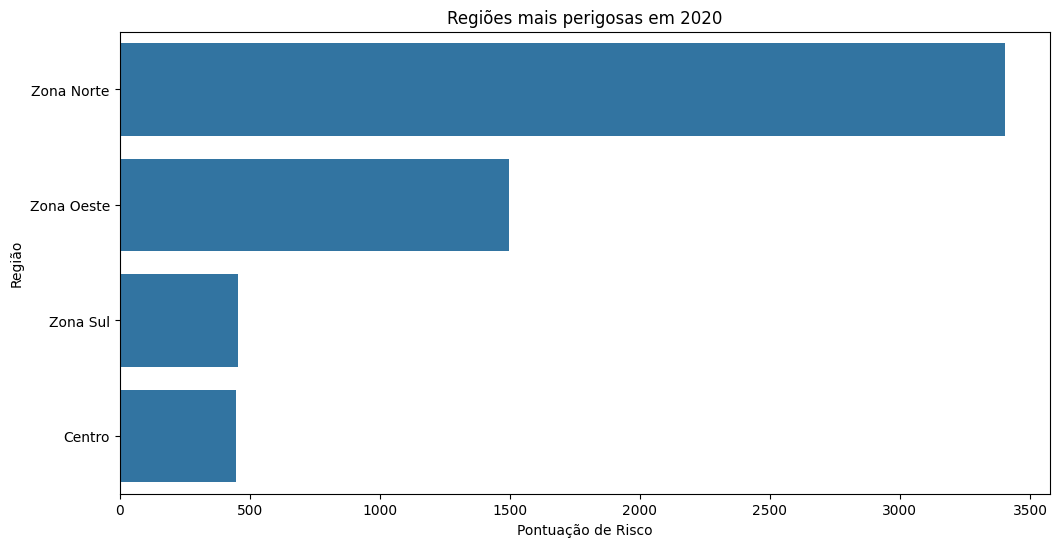

In [26]:
# Agrupar por região e somar a pontuação de risco
df_regioes = df_2020.groupby("regiao")["pontuacao_risco"].sum().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x="pontuacao_risco", y="regiao", data=df_regioes.sort_values("pontuacao_risco", ascending=False))
plt.xlabel("Pontuação de Risco")
plt.ylabel("Região")
plt.title("Regiões mais perigosas em 2020")
plt.show()


### **3.4. Gráfico de Linha**

📈 **Gráfico de Linha - Evolução dos Crimes ao longo do Tempo**

Este gráfico exibe a variação da criminalidade ao longo dos anos, permitindo identificar tendências e padrões sazonais.

📌 Elementos do gráfico:

🔹 Eixo X: Representa o tempo (anos e meses).

🔹 Eixo Y: Representa o total de ocorrências criminais registradas.

🔹 Linha Azul: Indica a evolução da criminalidade ao longo do tempo.

Com essa visualização, é possível analisar se os crimes estão aumentando, diminuindo ou se mantendo estáveis ao longo dos anos, auxiliando na identificação de períodos críticos e tendências de segurança pública.

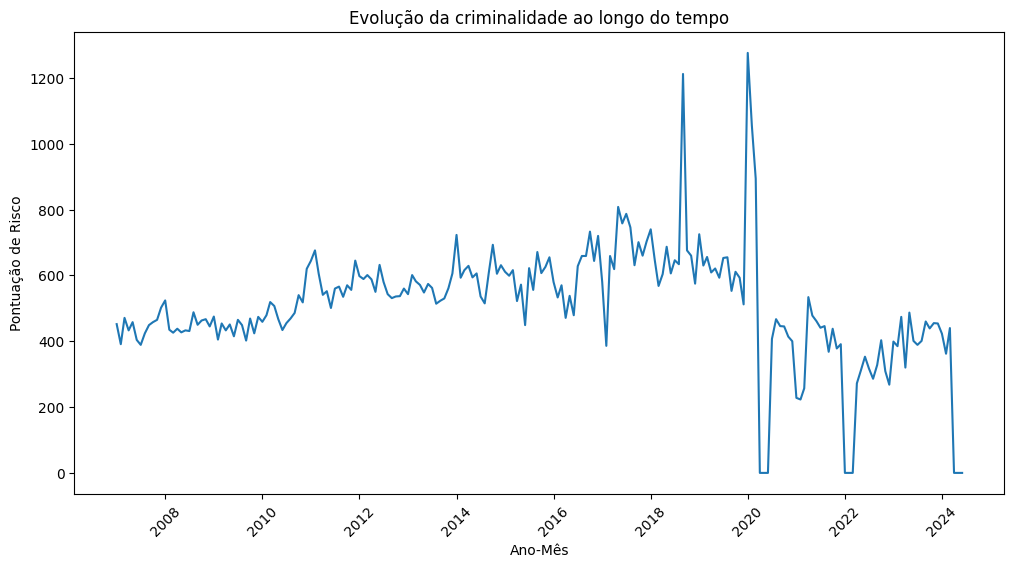

In [27]:
# Agrupar por mês e calcular a soma da pontuação de risco
df_temporal = df_relevante.groupby(["ano", "mes"])["pontuacao_risco"].sum().reset_index()

# Criar a coluna de data
df_temporal["data"] = pd.to_datetime(df_temporal["ano"].astype(str) + "-" + df_temporal["mes"].astype(str))

# Criar o gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(x="data", y="pontuacao_risco", data=df_temporal)
plt.xlabel("Ano-Mês")
plt.ylabel("Pontuação de Risco")
plt.title("Evolução da criminalidade ao longo do tempo")
plt.xticks(rotation=45)
plt.show()


## 4\. Machine Learning

Nesta etapa, aplicamos técnicas de Machine Learning para prever o risco das Unidades de Polícia Pacificadora (UPPs) com base em características históricas de segurança pública. Utilizamos dados de crimes, operações policiais e outras variáveis para construir um modelo preditivo, visando identificar padrões que possam ajudar na avaliação de risco nas diferentes regiões do Rio de Janeiro.

In [28]:
df_relevante.head()

,cod_upp,upp,ano,mes,hom_doloso,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,roubo_comercio,...,sequestro,armas_apreendidas,cump_mandado_prisao,pol_militares_mortos_serv,pol_civis_mortos_serv,pontuacao_risco,risco,latitude,longitude,regiao
0,1,Santa Marta,2007,1,0,0,0,0,1,0,...,0,2,1,0,0,2,Baixo,-22.946015,-43.193088,Zona Sul
1,2,Cidade De Deus,2007,1,3,0,0,1,18,0,...,0,7,2,0,0,55,Alto,-22.948784,-43.359918,Zona Oeste
2,3,Batam,2007,1,0,0,0,0,4,0,...,0,0,0,0,0,16,Alto,-22.859749,-43.429430,Zona Norte
3,4,Chapéu Mangueira Babilônia,2007,1,0,0,0,0,1,0,...,0,0,2,0,0,2,Baixo,-22.960151,-43.170403,Zona Sul
4,5,Pavão Pavãozinho,2007,1,0,0,0,0,4,0,...,0,0,0,0,0,7,Médio,-22.980447,-43.197690,Zona Sul


### **4.1. Pré-processamento**

Nesta etapa, selecionamos apenas as colunas relevantes para a análise e normalizamos os dados numéricos com MinMaxScaler, garantindo que fiquem na mesma escala. A variável categórica "regiao" foi transformada em variáveis dummy para uso no modelo. Além disso, a variável-alvo "risco" foi armazenada separadamente para evitar modificações. Esse processo assegura que os dados estejam prontos para a modelagem preditiva.

In [29]:
# Lista de colunas relevantes
colunas_relevantes = [
    "ano", "mes", "hom_doloso", "latrocinio", "hom_por_interv_policial",
    "tentat_hom", "lesao_corp_dolosa", "roubo_comercio", "armas_apreendidas",
    "cump_mandado_prisao", "latitude", "longitude", "regiao", "risco"
]

# Garantir que apenas as colunas existentes sejam usadas
colunas_existentes = [col for col in colunas_relevantes if col in df_relevante.columns]
df_ml = df_relevante[colunas_existentes].copy()

# Tratar valores nulos nas variáveis numéricas (substituir pela mediana)
df_ml.fillna(df_ml.median(numeric_only=True), inplace=True)

# Tratar valores nulos na variável categórica 'regiao'
if "regiao" in df_ml.columns:
    df_ml["regiao"].fillna("Desconhecido", inplace=True)

# Armazenar a variável "risco" separadamente para evitar qualquer modificação
if "risco" in df_ml.columns:
    coluna_risco = df_ml["risco"]

# Normalizar os dados numéricos (exceto a variável-alvo)
scaler = MinMaxScaler()
colunas_numericas = df_ml.select_dtypes(include=["int64", "float64"]).columns.drop("risco", errors="ignore")
df_ml[colunas_numericas] = scaler.fit_transform(df_ml[colunas_numericas])

# Reatribuir a variável "risco" sem alterações
if "risco" in df_ml.columns:
    df_ml["risco"] = coluna_risco

# Codificar a variável categórica 'regiao', se existir
if "regiao" in df_ml.columns:
    df_ml = pd.get_dummies(df_ml, columns=["regiao"], drop_first=True)

# Exibir as primeiras linhas do dataframe pronto
df_ml.head()

<ipython-input-29-dea609660194>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ml["regiao"].fillna("Desconhecido", inplace=True)


,ano,mes,hom_doloso,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,roubo_comercio,armas_apreendidas,cump_mandado_prisao,latitude,longitude,risco,regiao_Zona Norte,regiao_Zona Oeste,regiao_Zona Sul
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.014085,0.0,0.035088,0.03125,0.228043,0.929641,Baixo,False,False,True
1,0.0,0.0,0.3,0.0,0.0,0.025641,0.253521,0.0,0.122807,0.06250,0.215573,0.412211,Alto,False,True,False
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.056338,0.0,0.000000,0.00000,0.616557,0.196616,Alto,True,False,False
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.014085,0.0,0.000000,0.06250,0.164380,1.000000,Baixo,False,False,True
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.056338,0.0,0.000000,0.00000,0.072973,0.915368,Médio,False,False,True


### **4.2. Treino / Teste**

De maneira geral, um modelo de aprendizagem supervisionada precisa ser treinado com um conjunto de dados e avaliado com outro, assim conseguimos enter um pouco melhor a capacidade do modelo em **generalizar** as predições com dados não visto, que é a situação real em que será utilizado. Para tanto, dividimos nossa base de dados em duas: uma maior de **treino** e uma menor de **testes**.

In [30]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    df_ml.drop(['risco'], axis=1),
    df_ml['risco'],
    test_size=0.25,
    random_state=123
)

 - **Variáveis preditoras (predictors)**

In [31]:
predictors_train.head()

,ano,mes,hom_doloso,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,roubo_comercio,armas_apreendidas,cump_mandado_prisao,latitude,longitude,regiao_Zona Norte,regiao_Zona Oeste,regiao_Zona Sul
4673,0.588235,0.181818,0.1,0.0,0.166667,0.179487,0.126761,0.250,0.105263,0.28125,0.640733,0.000000,False,True,False
2051,0.235294,0.454545,0.4,0.0,0.222222,0.128205,0.253521,0.125,0.105263,0.03125,0.640733,0.000000,False,True,False
3144,0.352941,0.909091,0.0,0.0,0.000000,0.025641,0.140845,0.250,0.035088,0.00000,0.488419,0.722359,True,False,False
7534,0.941176,0.545455,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.00000,0.309452,0.824508,True,False,False
2077,0.235294,0.545455,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.00000,0.712431,0.636353,True,False,False


In [32]:
predictors_train.shape

(5985, 15)

In [33]:
predictors_test.head()

,ano,mes,hom_doloso,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,roubo_comercio,armas_apreendidas,cump_mandado_prisao,latitude,longitude,regiao_Zona Norte,regiao_Zona Oeste,regiao_Zona Sul
3516,0.411765,0.727273,0.0,0.0,0.0,0.076923,0.070423,0.0,0.0,0.03125,0.602501,0.659444,True,False,False
3629,0.411765,1.000000,0.0,0.0,0.0,0.153846,0.028169,0.0,0.0,0.00000,0.610401,0.685531,True,False,False
6176,0.764706,0.545455,0.0,0.0,0.0,0.000000,0.028169,0.0,0.0,0.00000,0.602501,0.659444,True,False,False
5042,0.647059,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.712994,0.638258,True,False,False
7310,0.941176,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.279520,0.902562,False,False,False


In [34]:
predictors_test.shape

(1995, 15)

 - **Variável resposta (target)**

In [35]:
target_train.head()

,risco
4673,Alto
2051,Alto
3144,Alto
7534,Baixo
2077,Baixo


In [36]:
target_train.shape

(5985,)

In [37]:
target_test.head()

,risco
3516,Médio
3629,Médio
6176,Médio
5042,Médio
7310,Baixo


In [38]:
target_test.shape

(1995,)

### **4.3. Treino**

O treino de modelos de aprendizagem supervisionada consiste na etapa de calculo dos parametros do modelo baseado na associação da variável resposta com os variáveis preditoras através do uso de um ou mais algoritmos. No caso da árvore de decisão, estamos interessados em encontrar um conjunto de regras simples (**nós**) que vão dividir o conjunto de dados em categorias (**folhas**) através do uso de uma métrica de **impureza**.

In [39]:
# Criando o modelo de árvore de decisão com um valor fixo para random_state
# Isso garante que os resultados sejam reproduzíveis ao rodar o código várias vezes
model = DecisionTreeClassifier(random_state=123)

In [40]:
# Treinando o modelo de árvore de decisão com os dados de treinamento
model = model.fit(predictors_train, target_train)

In [41]:
# Exibe os atributos internos do modelo treinado em formato de dicionário
# Isso permite visualizar parâmetros, hiperparâmetros e informações aprendidas durante o treinamento
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': 123,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'monotonic_cst': None,
 'feature_names_in_': array(['ano', 'mes', 'hom_doloso', 'latrocinio',
        'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa',
        'roubo_comercio', 'armas_apreendidas', 'cump_mandado_prisao',
        'latitude', 'longitude', 'regiao_Zona Norte', 'regiao_Zona Oeste',
        'regiao_Zona Sul'], dtype=object),
 'n_features_in_': 15,
 'n_outputs_': 1,
 'classes_': array(['Alto', 'Baixo', 'Médio'], dtype=object),
 'n_classes_': 3,
 'max_features_': 15,
 'tree_': <sklearn.tree._tree.Tree at 0x7ce55d83f280>}

Podemos visualizar a árvore de decisão gerada com o auxílio do pacote Python Graphviz.

In [42]:
# Exporta a estrutura da árvore de decisão em formato DOT (usado para visualização de grafos)
tree_data = tree.export_graphviz(model, out_file=None)
# Cria uma visualização da árvore usando a biblioteca Graphviz
graph = graphviz.Source(tree_data)
graph

### **4.4. Predição**

Com o modelo treinado, estamos prontos para fazer predições.

In [43]:
# Criar um dicionário com os dados da nova UPP fictícia
nova_upp = {
    "ano": 2025,
    "mes": 3,
    "hom_doloso": 10,
    "latrocinio": 1,
    "hom_por_interv_policial": 3,
    "tentat_hom": 5,
    "lesao_corp_dolosa": 20,
    "roubo_comercio": 7,
    "armas_apreendidas": 15,
    "cump_mandado_prisao": 8,
    "latitude": -22.90,
    "longitude": -43.20,
    "regiao": "Zona Norte"  # Região fictícia
}

# Converter para DataFrame
nova_upp_df = pd.DataFrame([nova_upp])

# Aplicar a mesma normalização usada no modelo treinado
colunas_numericas = df_ml.select_dtypes(include=["int64", "float64"]).columns.drop("risco", errors="ignore")
nova_upp_df[colunas_numericas] = scaler.transform(nova_upp_df[colunas_numericas])

# Codificar a variável categórica "regiao" usando as mesmas dummies do dataset original
nova_upp_df = pd.get_dummies(nova_upp_df, columns=["regiao"])

# Garantir que as colunas da nova UPP estão na mesma ordem das colunas do modelo treinado
colunas_faltantes = set(predictors_train.columns) - set(nova_upp_df.columns)
for col in colunas_faltantes:
    nova_upp_df[col] = 0  # Adiciona colunas faltantes com valor 0

# Reordenar as colunas para garantir compatibilidade
nova_upp_df = nova_upp_df[predictors_train.columns]

# Fazer a previsão
previsao = model.predict(nova_upp_df)

# Exibir o resultado
print(f"Previsão de risco para a nova UPP: {previsao[0]}")


Previsão de risco para a nova UPP: Alto


### **4.5. Avaliação**

Para enter o poder preditivo do modelo de aprendizagem supervisionada, precisamos avaliar sua capacidade de generalização, ou seja, avalivar as predições em dados "não vistos" na etapa de treino. Comparamos então as predições com os dados reais através de uma métrica.

 - **Posição predita**

In [44]:
target_predicted = model.predict(predictors_test)

In [45]:
target_predicted[0:5]

array(['Médio', 'Alto', 'Médio', 'Médio', 'Baixo'], dtype=object)

In [46]:
target_predicted.shape

(1995,)

 - **Posição teste**

In [47]:
target_test[0:5]

,risco
3516,Médio
3629,Médio
6176,Médio
5042,Médio
7310,Baixo


In [108]:
target_test.shape

(1995,)

### **4.6. Matriz de confusão**

A matriz de confusão é uma técnica que resume as predições feitas por um modelo supervisionado de classificação em uma matriz, facilitando a comparação com as classes reais. A soma dos elementos da diagonal princial da matriz apresenta a quantidade de classes corretamente classificadas. Da matriz de confusão derivam-se diversas outras métricas, como a **acurácia**.

In [48]:
# Calcula a matriz de confusão comparando os valores reais (target_test) com as previsões do modelo (target_predicted)
cm = confusion_matrix(target_test, target_predicted)
print(confusion_matrix)

<function confusion_matrix at 0x7ce55eb0b4c0>


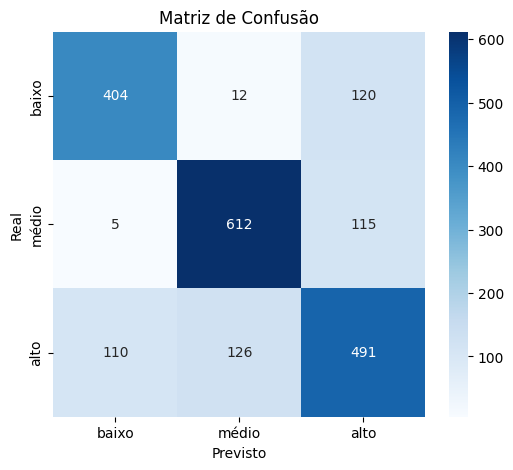

In [49]:
# Mapear as labels numéricas para as categorias desejadas
label_mapping = {0: 'baixo', 1: 'médio', 2: 'alto'}

# Gerar previsões no conjunto de teste
pred_test = model.predict(predictors_test)

# Criar a matriz de confusão
cm = confusion_matrix(target_test, pred_test)

# Criar um heatmap da matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(label_mapping.values()),  # Corrigido: usar list() para evitar erro
            yticklabels=list(label_mapping.values()))

# Adicionar títulos
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

### **4.7. Acurácia**

A **acurácia** é uma métrica que combina a exatidão (o quão certo) e a precisão (o quanto desvia) das predições de um modelo supervisionado de classificação. É definida como a soma das classificações corretas (real igual ao predito) dividida pelo total de classificações realizadas.

In [50]:
acuracia = accuracy_score(target_test, target_predicted)
print(acuracia)

0.7553884711779448


In [51]:
print(f'{round(100 * acuracia, 2)}%')

75.54%


### **4.8. Conclusões**

**Construção do Modelo de Machine Learning**

Escolhemos um modelo de **Árvore de Decisão** devido à sua simplicidade e capacidade de lidar bem com dados mistos (categóricos e numéricos). O processo foi realizado em várias etapas:

* **Divisão de Dados**: O dataset foi dividido em 75% para treino e 25% para teste.

* **Treinamento e Avaliação**: Utilizamos a métrica de acurácia para avaliar o modelo. A árvore de decisão obteve uma acurácia de 75%, o que sugere que o modelo está realizando classificações razoáveis, embora haja margem para aprimoramento.

* **Matriz de Confusão**: A matriz de confusão revelou que o modelo tem mais facilidade em classificar as categorias de risco "baixo" e "médio", mas há dificuldades em classificar corretamente as UPPs de risco "alto", especialmente quando um risco "baixo" é classificado erroneamente como "médio".

**Resultados e Avaliação**

O modelo apresentou um bom desempenho geral com 75% de acurácia, mas alguns ajustes podem ser feitos para melhorar a classificação das UPPs com risco mais elevado. A matriz de confusão evidenciou erros de classificação entre as categorias de risco, principalmente entre "baixo" e "médio", e entre "médio" e "alto". A partir disso, é possível investigar possíveis melhorias, como o ajuste de hiperparâmetros ou a utilização de modelos mais complexos, como o Random Forest ou Gradient Boosting.

##5\. Conclusão

Este projeto visou analisar e prever o risco nas Unidades de Polícia Pacificadora (UPPs) do Rio de Janeiro com base em características históricas de incidentes e crimes. Após realizar o pré-processamento dos dados e aplicar modelos de Machine Learning, foi possível desenvolver um modelo capaz de classificar as UPPs em diferentes níveis de risco (baixo, médio e alto). Através de uma árvore de decisão, alcançamos uma boa acurácia na previsão do risco, permitindo identificar áreas com maior necessidade de intervenção policial.

A matriz de confusão mostrou que, apesar da alta acurácia do modelo, houve algumas classificações incorretas entre os níveis de risco, o que indica que há espaço para melhorias, como a otimização do modelo e o uso de mais dados ou algoritmos mais complexos, como Random Forest ou XGBoost. No entanto, os resultados obtidos já fornecem uma base sólida para auxiliar nas decisões de segurança pública, especialmente na alocação de recursos e estratégias preventivas nas UPPs.

Esse estudo contribui para a utilização de técnicas de análise de dados e aprendizado de máquina no campo da segurança pública, com potencial para ser expandido e ajustado conforme novos dados se tornem disponíveis, ampliando sua aplicabilidade em outros contextos de segurança.

